# Research Methods - Assignment 1

- André Santos
- Luís Espírito Santo
- Miguel Guerreiro

In [ ]:
!pip -q install ipympl

In [17]:
#%matplotlib widget
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
from matplotlib.animation import FuncAnimation, PillowWriter 
import math

from mpl_toolkits import mplot3d
from google.colab import output
output.enable_custom_widget_manager()

## Read Data

In [ ]:
!gdown --id 14JNDxrBMdbWjGM4dbXUwnJY1zA9E2GSe

Downloading...
From: https://drive.google.com/uc?id=14JNDxrBMdbWjGM4dbXUwnJY1zA9E2GSe
To: /content/measurements_v2.csv
100% 4.52M/4.52M [00:00<00:00, 39.7MB/s]


In [ ]:
df = pd.read_csv("measurements_v2.csv", index_col=0)
df = df[df.loc[:,"Exams"]<19]
df.describe()

,Exams,Percentage,Seed1,Seed2,Solution_code1,Time_code1,Solution_code2,Time_code2
count,101808.000000,101808.000000,101808.000000,101808.000000,50904.000000,50904.000000,50904.000000,50904.000000
mean,11.500000,0.500000,1327.500000,31237.500000,4.331919,5.917431,4.363665,5.994136
std,4.031149,0.291549,1.707834,1.707834,2.482257,39.394401,2.439653,39.624103
min,5.000000,0.000000,1325.000000,31235.000000,-1.000000,0.000004,-1.000000,0.000003
25%,8.000000,0.250000,1326.000000,31236.000000,3.000000,0.000023,3.000000,0.000008
50%,11.500000,0.500000,1327.500000,31237.500000,4.000000,0.000077,4.000000,0.000034
75%,15.000000,0.750000,1329.000000,31239.000000,6.000000,0.000656,6.000000,0.000670
max,18.000000,1.000000,1330.000000,31240.000000,13.000000,300.000004,13.000000,300.000013


In [ ]:
#Defining extra columns
df["code"] = np.where(df["Time_code1"].isnull(), "Code2", "Code1" )
df["time"] = np.where(df["code"] == "Code1", df["Time_code1"], df["Time_code2"])
df["time_log"] = np.log(df["time"])
df["edges"] = df["Percentage"]*(df["Exams"]**2-df["Exams"])//2
df

,Exams,Percentage,Seed1,Seed2,Solution_code1,Time_code1,Solution_code2,Time_code2,code,time,time_log,edges
0,5,0.0,1325,31235,1.0,0.000009,NaN,NaN,Code1,0.000009,-11.618286,0.0
1,5,0.0,1325,31236,1.0,0.000009,NaN,NaN,Code1,0.000009,-11.618286,0.0
2,5,0.0,1325,31237,1.0,0.000008,NaN,NaN,Code1,0.000008,-11.736069,0.0
3,5,0.0,1325,31238,1.0,0.000008,NaN,NaN,Code1,0.000008,-11.736069,0.0
4,5,0.0,1325,31239,1.0,0.000020,NaN,NaN,Code1,0.000020,-10.819778,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
105219,18,1.0,1330,31236,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,153.0
105220,18,1.0,1330,31237,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,153.0
105221,18,1.0,1330,31238,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,153.0
105222,18,1.0,1330,31239,NaN,NaN,-1.0,300.000001,Code2,300.000001,5.703782,153.0


In [ ]:
#d_temp = df.loc[df["code"]=="Code1", :].groupby(["Exams","edges"]).mean().reset_index()

#plt.scatter(d_temp["edges"], d_temp["time_log"])

## Exploratory Data Analysis

In [ ]:
# Seed1 Values
df["Seed1"].unique()

array([1325, 1326, 1327, 1328, 1329, 1330])

In [ ]:
# Seed2 Values
df["Seed2"].unique()

array([31235, 31236, 31237, 31238, 31239, 31240])

In [ ]:
# Number of Exams (n)
df["Exams"].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

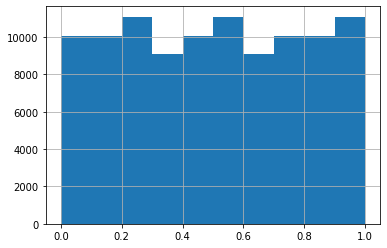

In [ ]:
# Probabilities (p)
df["Percentage"].hist()

### Histograms

Text(36.125, 0.5, 'Log-Frequency')

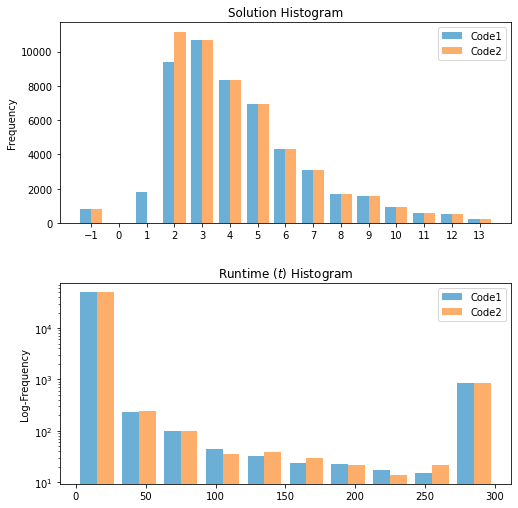

In [ ]:
# Histograms of Time and Solutions
fig, axes = plt.subplots(nrows=2,
                         ncols=1,
                        figsize=(7, 7))

fig.tight_layout()
plt.subplots_adjust(hspace=0.3)

columns = ["Solution_code1", "Solution_code2"]
colors = ["#6baed6","#fdae6b"]
legend = ["Code1", "Code2"]
title = 'Solution Histogram'
#axes[0].xticks = range(-1,14)
#axes[0].xticklabels = range(-1,14)
axes[0].hist(df.loc[:,columns].to_numpy(), color=colors, bins=(np.arange(-1,15)-0.5))
axes[0].legend(legend)
axes[0].set_title(title)
axes[0].set(xticks=range(-1,14))
axes[0].set_ylabel("Frequency")

columns = ["Time_code1", "Time_code2"]
colors = ["#6baed6","#fdae6b"]
legend = ["Code1", "Code2"]
title = 'Runtime ($t$) Histogram'
axes[1].hist(df.loc[:,columns].to_numpy(), color=colors, log=True)
axes[1].legend(legend)
axes[1].set_title(title)
axes[1].set_ylabel("Log-Frequency")

### Cutoff Count

Text(0.5, 1.0, 'Cutoff sample count - Code2')

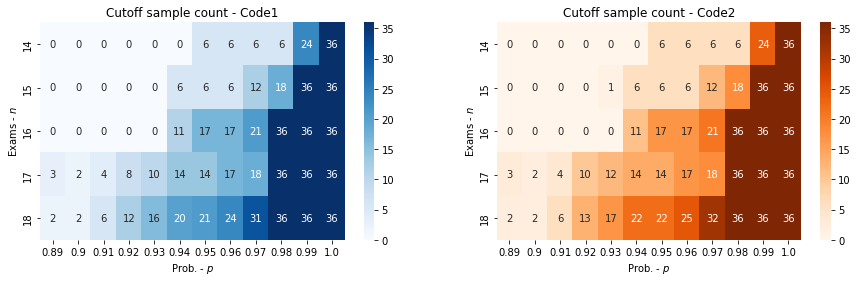

In [ ]:
#Remove those with no solution
cutoff_index = ((df["Solution_code1"].isnull()) | (df["Solution_code1"]>0)) & (df["Solution_code2"].isnull()) | (df["Solution_code2"]>0)

df_remove = df.loc[~cutoff_index]
df_remove = df_remove.groupby(["Exams", "Percentage"]).count().reset_index()

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4))

count = df_remove.pivot_table(values="Time_code1", index="Exams", columns='Percentage', aggfunc='first').fillna(0)
sns.heatmap(count,  cmap="Blues", annot=True, ax=axes[0], xticklabels=[f'{i:.2}' for i in sorted(df_remove["Percentage"].unique())])
axes[0].set_xlabel("Prob. - $p$")
axes[0].set_ylabel("Exams - $n$")
axes[0].set_title ("Cutoff sample count - Code1")

count = df_remove.pivot_table(values="Time_code2", index="Exams", columns='Percentage', aggfunc='first').fillna(0)
sns.heatmap(count,  cmap="Oranges", annot=True, ax=axes[1], xticklabels=[f'{i:.2}' for i in sorted(df_remove["Percentage"].unique())])
axes[1].set_xlabel("Prob. - $p$")
axes[1].set_ylabel("Exams - $n$")
axes[1].set_title ("Cutoff sample count - Code2")

### Correlation Matrix

([<matplotlib.axis.YTick at 0x7f14c12a5110>,
 [Text(0, 0.5, 'Seed 1'),
  Text(0, 1.5, 'Seed 2'),
  Text(0, 2.5, 'Exams - $n$'),
  Text(0, 3.5, 'Prob. - $p$'),
  Text(0, 4.5, 'Runtime \nCode 1 - $t_1$'),
  Text(0, 5.5, 'Runtime \nCode 2 - $t_2$')])

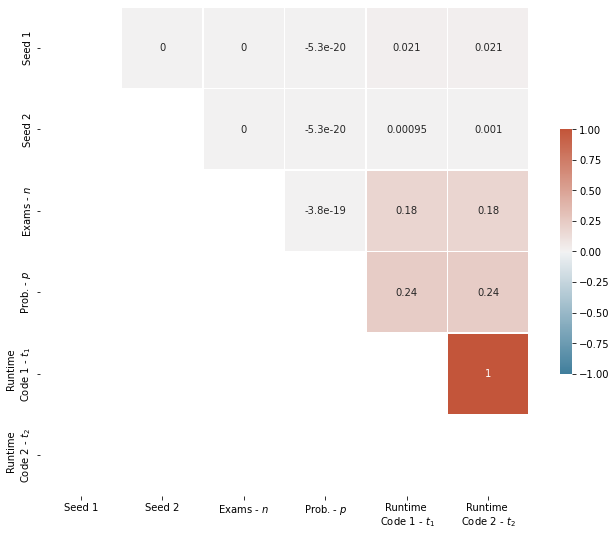

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
d = df.groupby(["Seed1","Seed2","Exams", "Percentage"]).mean().reset_index().loc[:,["Seed1", "Seed2", "Exams", "Percentage", "Time_code1", "Time_code2"]]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1, annot=True, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ["Seed 1", "Seed 2", "Exams - $n$", "Prob. - $p$", "Runtime \nCode 1 - $t_1$", "Runtime \nCode 2 - $t_2$" ])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], ["Seed 1", "Seed 2", "Exams - $n$", "Prob. - $p$", "Runtime \nCode 1 - $t_1$", "Runtime \nCode 2 - $t_2$" ])

### Q-Q Plot

Text(0.5, 1.0, 'QQ Plot - Log-Runtime')

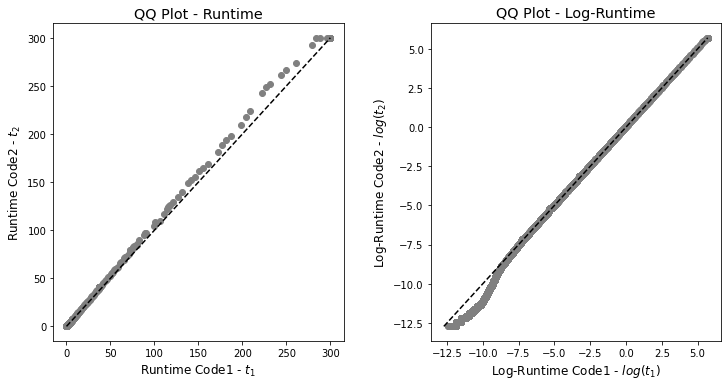

In [ ]:
data_qq = df.groupby(["Seed1", "Seed2", "Exams", "Percentage"]).mean().reset_index()

fig, axes = plt.subplots(nrows=1,
                         ncols=2,
                         figsize=(10, 5))

fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

#1 Non log
percs = np.linspace(0,100,10001)

qn_a = np.percentile(data_qq["Time_code1"], percs)
qn_b = np.percentile(data_qq["Time_code2"], percs)

axes[0].plot(qn_a,qn_b, ls="", marker="o", color="grey")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
axes[0].plot(x,x, color="k", ls="--")

axes[0].set_xlabel(f"Runtime Code1 - $t_1$", size='large')
axes[0].set_ylabel(f"Runtime Code2 - $t_2$", size='large')
axes[0].set_title("QQ Plot - Runtime", fontsize="x-large")  

#2 Log
percs = np.linspace(0,100,10001)

qn_a = np.percentile(np.log(data_qq["Time_code1"]), percs)
qn_b = np.percentile(np.log(data_qq["Time_code2"]), percs)

axes[1].plot(qn_a,qn_b, ls="", marker="o", color="grey")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
axes[1].plot(x,x, color="k", ls="--")

axes[1].set_xlabel(f"Log-Runtime Code1 - $log(t_1)$", size='large')
axes[1].set_ylabel(f"Log-Runtime Code2 - $log(t_2)$", size='large')
axes[1].set_title("QQ Plot - Log-Runtime",  fontsize="x-large")  
#pplot(df, x="Time_code1", y="Time_code2", kind='qq',  
#      height=4, aspect=1.5, display_kws={"identity":True, "fit": True, "reg":True, "ci":0.00005})

### Boxplots

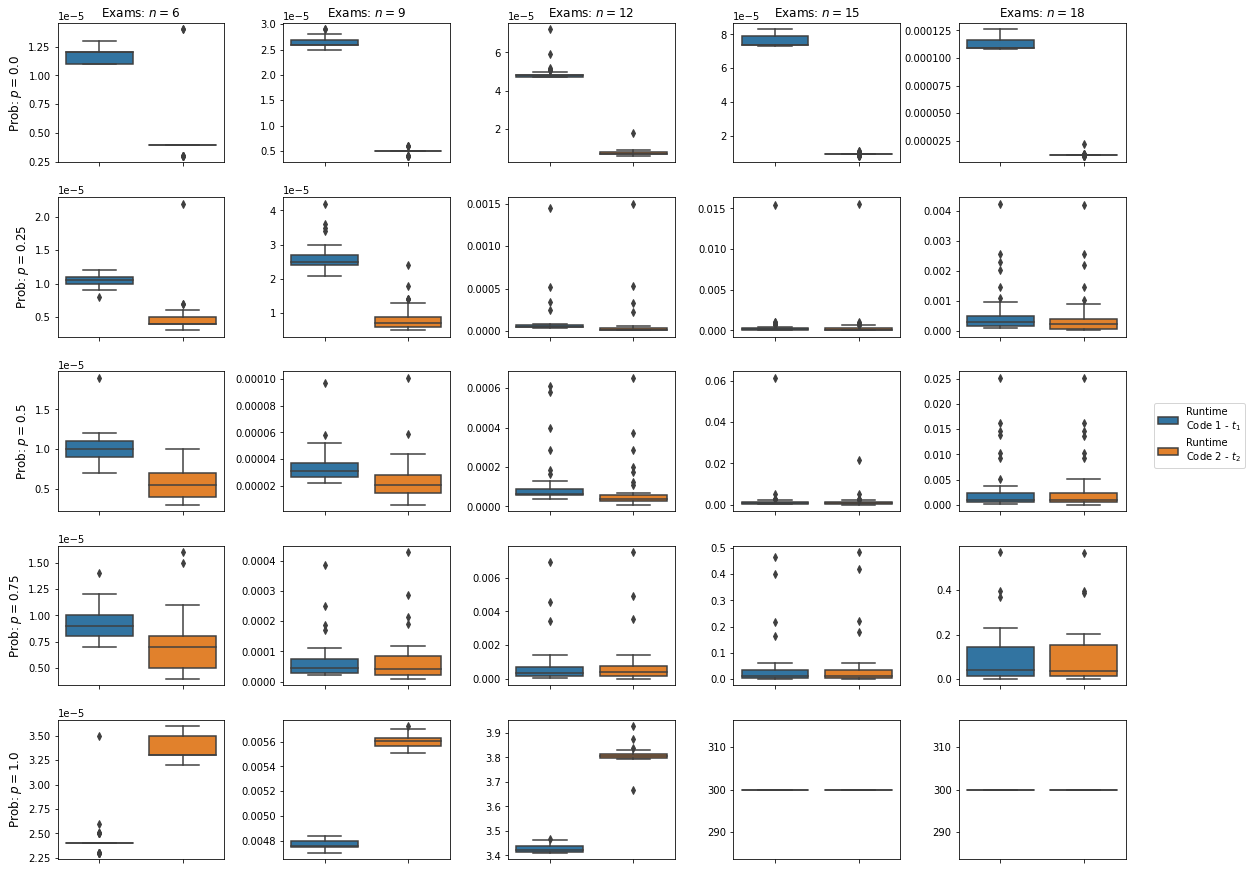

In [ ]:
import itertools
import matplotlib

i=0

range_exams = range(6, 19, 3)
range_perc = np.linspace(0,1,5)
fig, axes = plt.subplots(nrows=len(range_perc),
                               ncols=len(range_exams),
                               figsize=(17, 15))
fig.tight_layout()
plt.subplots_adjust(top=0.8, 
                    right=0.9, wspace=0.35, hspace=0.25)

for (p,e),ax in zip(itertools.product(range_perc,range_exams),
                    list(itertools.chain.from_iterable(axes))):
  
    data = df.loc[(df["Exams"] == e) & (np.isclose(df["Percentage"],p))]
    m = sns.boxplot(x="code", y="time", data=data, ax=ax)
    ax.set(ylabel=None)
    ax.set(xlabel=None)
    ax.set(xticklabels=[])
    #ax.set(yticklabels=[])
    handles = list(filter(lambda x: type(x) is matplotlib.patches.PathPatch, m.get_children()))
    #print(handles)

for ax, col in zip(axes[0], range_exams):
    ax.set_title(f"Exams: $n={col}$")

for ax, row in zip(axes[:,0], range_perc):
    ax.set_ylabel(f"Prob: $p={row}$", size='large')

#leg = ax.legend(loc='center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=2)

labels = ["Runtime \nCode 1 - $t_1$", "Runtime \nCode 2 - $t_2$"]
fig.legend(handles, labels, loc='center right')


### 3D Scatter

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


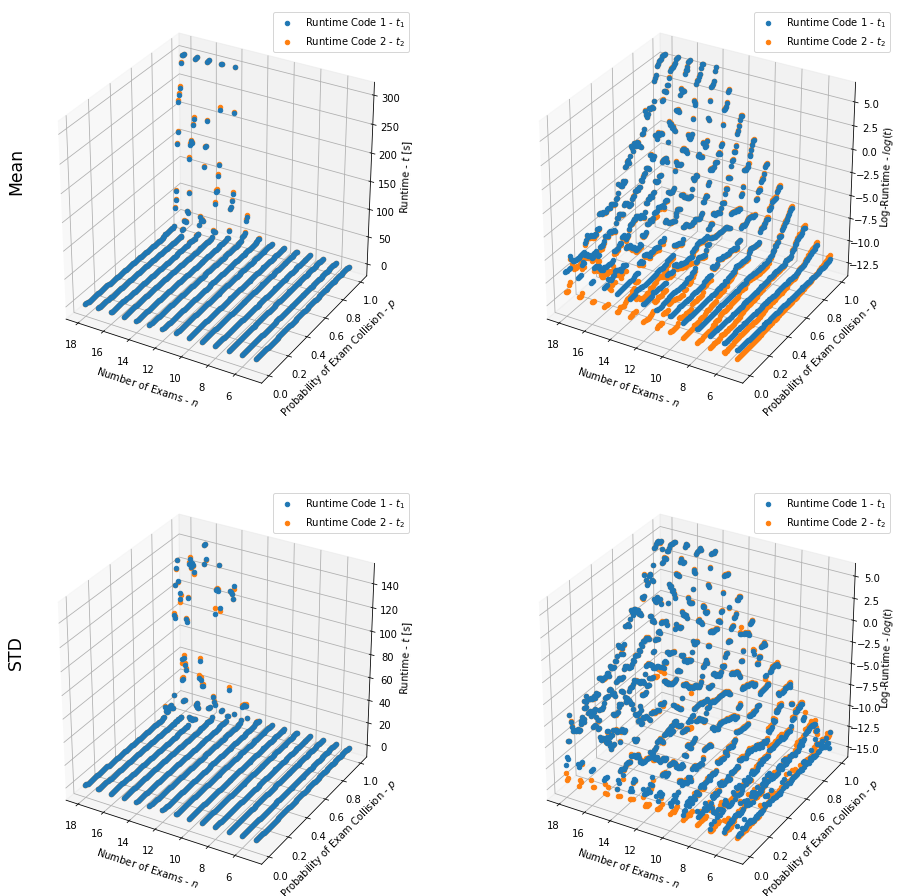

In [ ]:
#Plot 3D scatter

def scatter3D(log):
  # Data for three-dimensional scattered points
  for code, color, desc in [(1, "Blues", "$t_1$"), (2, "Oranges", "$t_2$")]:
    if log:
      zdata = np.log(data_d["Time_code{}".format(code)])
    else:
      zdata = data_d["Time_code{}".format(code)]
    xdata = data_d["Exams"]
    ydata = data_d["Percentage"]
    s = ax.scatter3D(xdata, ydata, zdata, depthshade=False, cmap=color);
    s.set_label('Runtime Code {} - {}'.format(code, desc))

  #ticks = np.arange(0, 20, 2) - 14
  #tick_labels = [r'$10^{%i}$'%(i) for i in ticks]

  #ax.set_zticks(ticks)
  #ax.set_zticklabels(tick_labels)
  ax.set_xlabel('Number of Exams - $n$')
  ax.set_ylabel('Probability of Exam Collision - $p$')
  if log:
    ax.set_zlabel('Log-Runtime - $log(t)$')
  else:
    ax.set_zlabel('Runtime - $t$ [s]')
  ax.legend()

  #ax.view_init(30, 0)

fig = plt.figure(figsize=(14,14))
plt.subplots_adjust(right=1, top=1)

#mean
data_d = df.groupby(["Exams", "Percentage"]).mean().reset_index()
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.invert_xaxis()
scatter3D(log=False)
ax.annotate("Mean", xy=(-2, 2), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='xx-large', ha='right', va='center', rotation="vertical")

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.invert_xaxis()
scatter3D(log=True)

#std
data_d = df.groupby(["Exams", "Percentage"]).std().reset_index()
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.invert_xaxis()
scatter3D(log=False)
ax.annotate("STD", xy=(-2, 2), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='xx-large', ha='right', va='center', rotation="vertical")


ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.invert_xaxis()
scatter3D(log=True)

plt.show()

labels = ["Runtime \nCode 1 - $t_1$", "Runtime \nCode 2 - $t_2$"]
fig.legend(handles, labels, loc='center right')

In [ ]:

# SHOWS A 3D WIDGET
#widgets.interact(scatter3D, t= widgets.Play(min=0,max =15));

In [ ]:
#CREATE A GIF

"""
def update(i):  
     ax.view_init(30, i)

ani = FuncAnimation(fig, update, np.arange(0, 360,20), init_func=scatter3D)  
writer = PillowWriter(fps=2)  
ani.save("3d.gif", writer=writer)
"""  

'\ndef update(i):  \n     ax.view_init(30, i)\n\nani = FuncAnimation(fig, update, np.arange(0, 360,20), init_func=scatter3D)  \nwriter = PillowWriter(fps=2)  \nani.save("3d.gif", writer=writer)\n'

### Variation

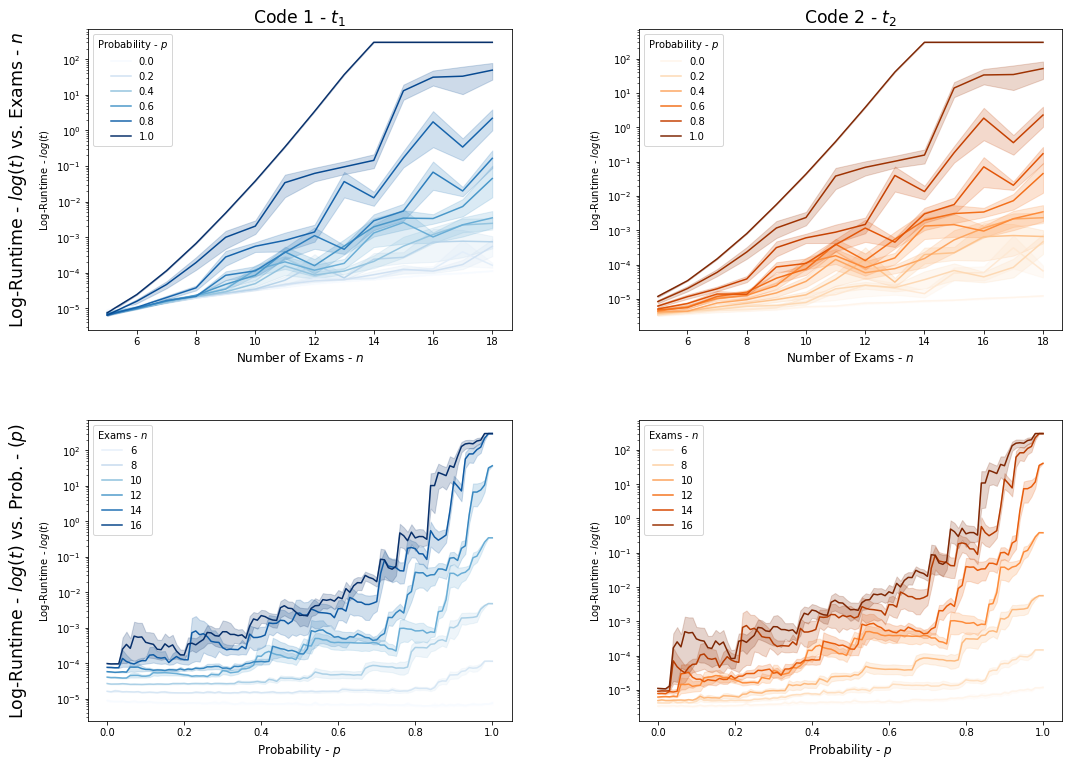

In [ ]:
fig, axes = plt.subplots(nrows=2,
                         ncols=2,
                         figsize=(14, 10))
fig.tight_layout()
plt.subplots_adjust(right=1, top=1, wspace=0.3, hspace=0.3)

#p in selected
l = np.linspace(0,1,11)
p_index = df.loc[:, ["Percentage"]].applymap(lambda x: any(np.isclose(x,l)))["Percentage"]

#n in selected
l = np.linspace(5,17,7)
n_index = df.loc[:, ["Exams"]].applymap(lambda x: any(np.isclose(x,l)))["Exams"]


for i, code, color in [(0, "Code1", "Blues"), 
                       (1, "Code2", "Oranges"), ]: 
  ax = axes[0][i]
  grid = sns.lineplot(data=df.loc[p_index], x="Exams", y=f"Time_{code.lower()}", hue="Percentage", palette=color, ax=ax)
  grid.set(yscale="log")
  ax.set_xlabel("Number of Exams - $n$", size='large')
  ax.set_ylabel('Log-Runtime - $log(t)$')
  ax.set_title("Code {} - $t_{}$".format(code[-1], code[-1]), fontsize='xx-large')
  ax.legend(title="Probability - $p$")

  ax = axes[1][i]
  grid = sns.lineplot(data=df.loc[n_index], x="Percentage", y=f"Time_{code.lower()}", hue="Exams", palette=color, ax=ax)
  grid.set(yscale="log")
  ax.set_xlabel("Probability - $p$", size='large')
  ax.set_ylabel('Log-Runtime - $log(t)$')
  ax.legend(title="Exams - $n$")

pad = 5
for ax, row in zip(axes[:,0], ["Log-Runtime - $log(t)$ vs. Exams - $n$", "Log-Runtime - $log(t)$ vs. Prob. - ($p$)"]):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='xx-large', ha='right', va='center', rotation="vertical")

## Linear Regression

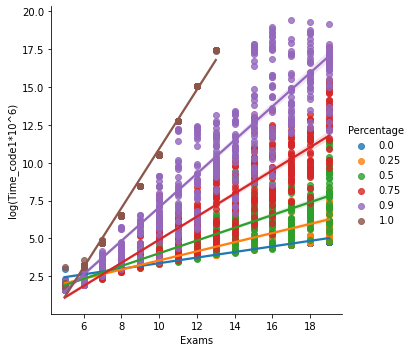

In [ ]:
p_class = df.loc[:, ["Percentage"]].applymap(lambda x: str(round(x, 2)))
p_index = p_class.applymap(lambda x: x in ["0.0", "0.25", "0.5", "0.75", "0.9", "1.0"])["Percentage"]

df['Time_code1'] = df["Time_code1"].apply(lambda y: math.log(y * (10 ** 6)))
grid = sns.lmplot(data=df.loc[p_index], x="Exams", y="Time_code1", hue="Percentage")
grid = grid.set_axis_labels("Exams", "log(Time_code1*10^6)")

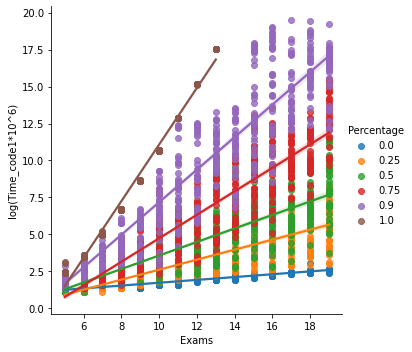

In [ ]:
p_class = df.loc[:, ["Percentage"]].applymap(lambda x: str(round(x, 2)))
p_index = p_class.applymap(lambda x: x in ["0.0", "0.25", "0.5", "0.75", "0.9", "1.0"])["Percentage"]

df['Time_code2'] = df["Time_code2"].apply(lambda y: math.log(y * (10 ** 6)))
grid = sns.lmplot(data=df.loc[p_index], x="Exams", y="Time_code2", hue="Percentage")
grid = grid.set_axis_labels("Exams", "log(Time_code1*10^6)")

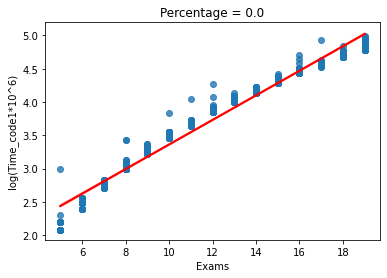

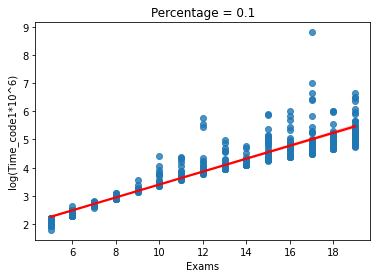

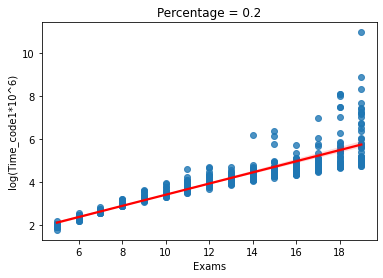

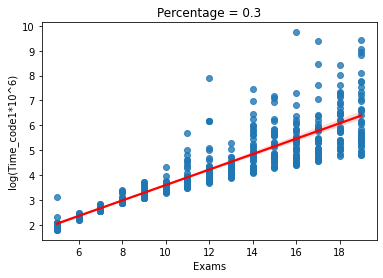

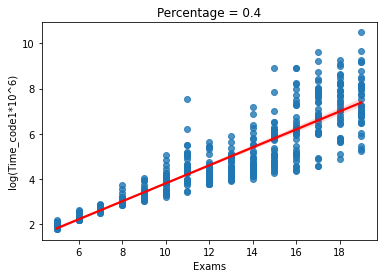

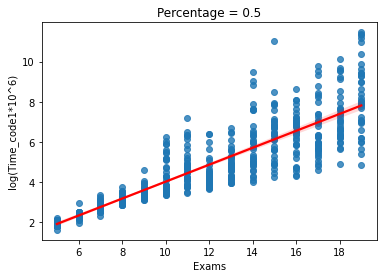

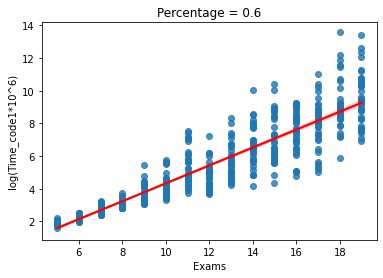

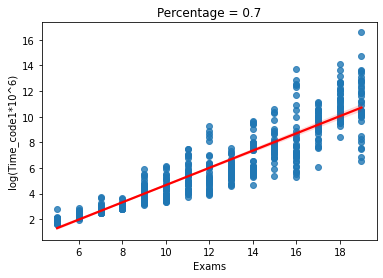

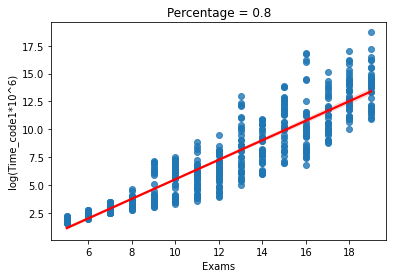

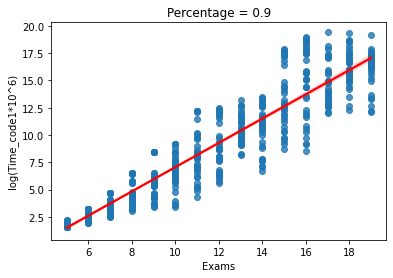

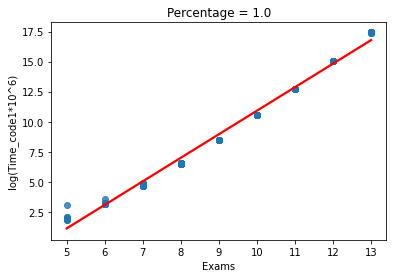

In [ ]:
for p in range(0, 11, 1):

    p = p/10
    p_index = p_class.applymap(lambda x: x in [str(p)])["Percentage"]

    grid = sns.regplot(data=df.loc[p_index], x="Exams", y="Time_code1", line_kws={"color": "red"})
    grid.set(ylabel="log(Time_code1*10^6)", title=f"Percentage = {str(p)}")

    plt.show()

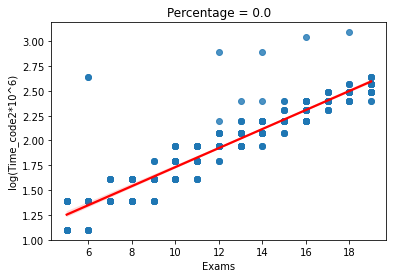

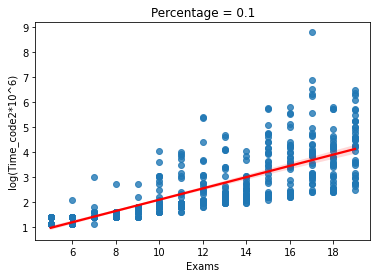

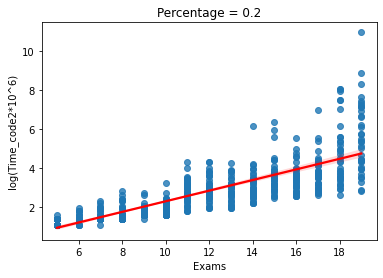

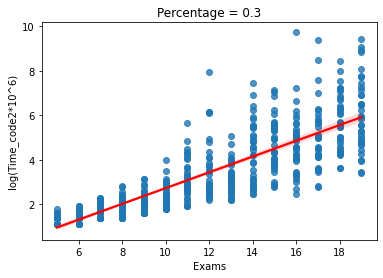

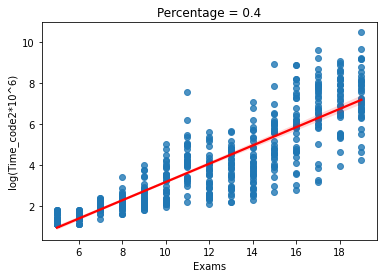

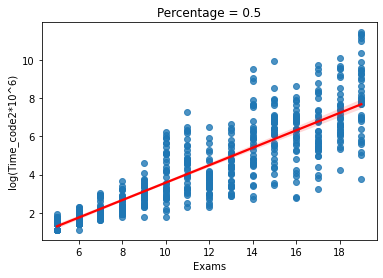

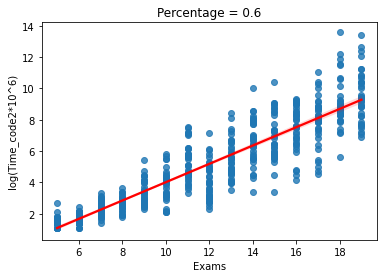

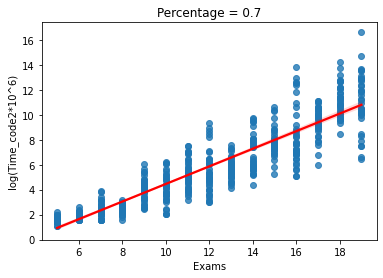

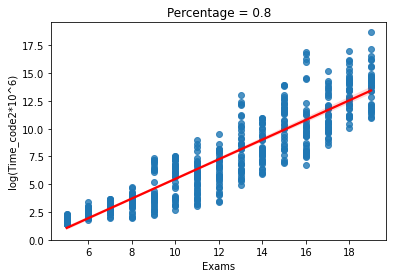

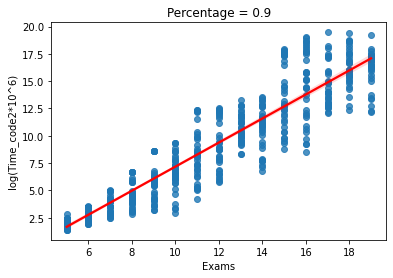

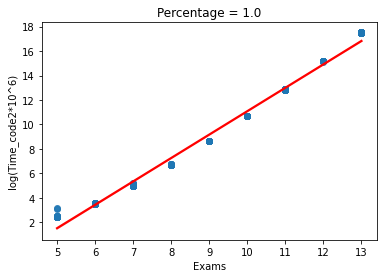

In [ ]:
for p in range(0, 11, 1):

    p = p/10
    p_index = p_class.applymap(lambda x: x in [str(p)])["Percentage"]

    grid = sns.regplot(data=df.loc[p_index], x="Exams", y="Time_code2", line_kws={"color": "red"})
    grid.set(ylabel="log(Time_code2*10^6)", title=f"Percentage = {str(p)}")

    plt.show()

[None]

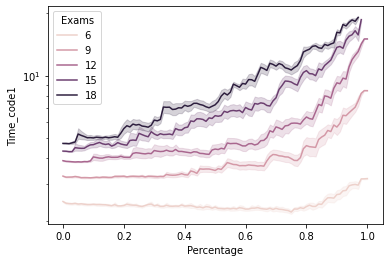

In [ ]:
p_class = df.loc[:, ["Exams"]].applymap(lambda x: str(x))
p_index = p_class.applymap(lambda x: x in ["6", "9", "12", "15", "18"])["Exams"]

grid = sns.lineplot(data=df.loc[p_index], x="Percentage", y="Time_code1", hue="Exams")
grid.set(yscale="log")

[None]

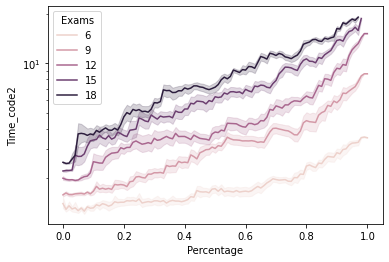

In [ ]:
p_class = df.loc[:, ["Exams"]].applymap(lambda x: str(x))
p_index = p_class.applymap(lambda x: x in ["6", "9", "12", "15", "18"])["Exams"]

grid = sns.lineplot(data=df.loc[p_index], x="Percentage", y="Time_code2", hue="Exams")
grid.set(yscale="log")

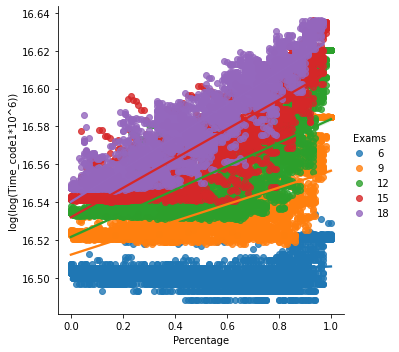

In [ ]:
p_class = df.loc[:, ["Exams"]].applymap(lambda x: str(x))
p_index = p_class.applymap(lambda x: x in ["6", "9", "12", "15", "18"])["Exams"]

df['Time_code1'] = df["Time_code1"].apply(lambda y: math.log(y * (10 ** 6)))
df['Time_code1'] = df["Time_code1"].apply(lambda y: math.log(y * (10 ** 6)))
grid = sns.lmplot(data=df.loc[p_index], x="Percentage", y="Time_code1", hue="Exams")
grid = grid.set_axis_labels("Percentage", "log(log(Time_code1*10^6))")

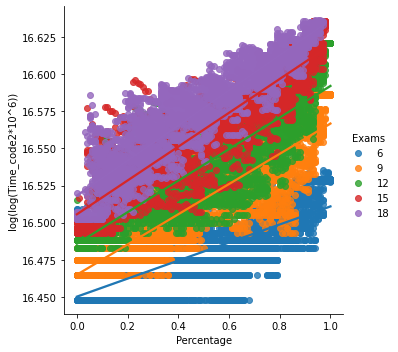

In [ ]:
p_class = df.loc[:, ["Exams"]].applymap(lambda x: str(x))
p_index = p_class.applymap(lambda x: x in ["6", "9", "12", "15", "18"])["Exams"]

df['Time_code2'] = df["Time_code2"].apply(lambda y: math.log(y * (10 ** 6)))
df['Time_code2'] = df["Time_code2"].apply(lambda y: math.log(y * (10 ** 6)))
grid = sns.lmplot(data=df.loc[p_index], x="Percentage", y="Time_code2", hue="Exams")
grid = grid.set_axis_labels("Percentage", "log(log(Time_code2*10^6))")

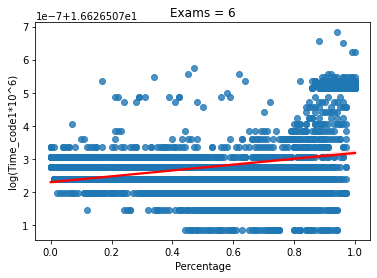

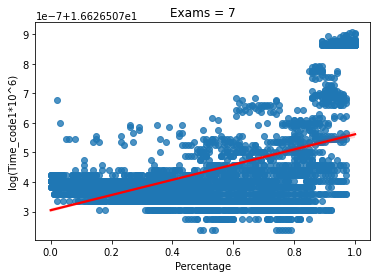

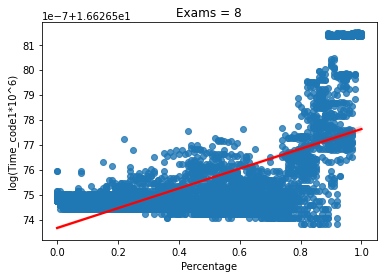

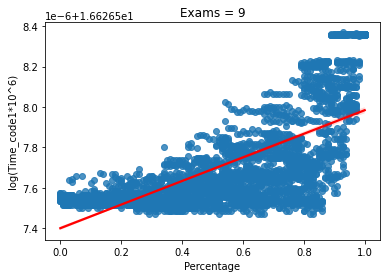

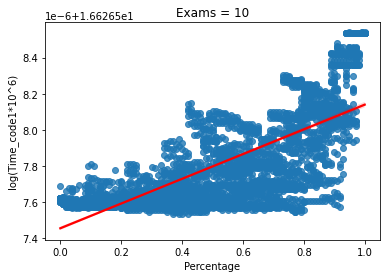

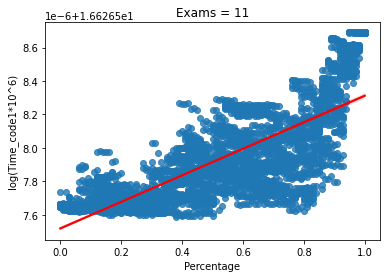

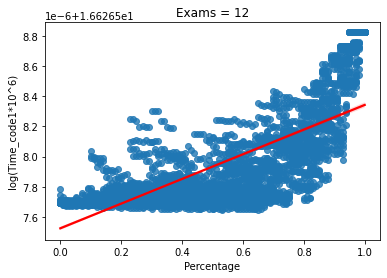

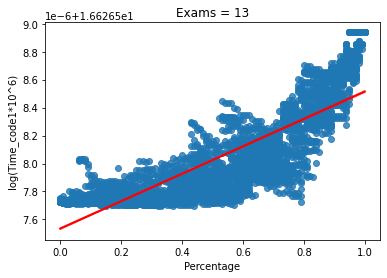

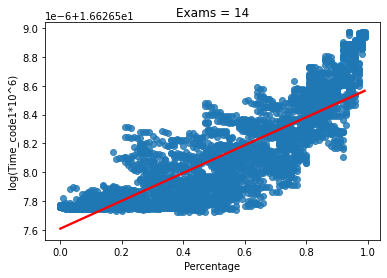

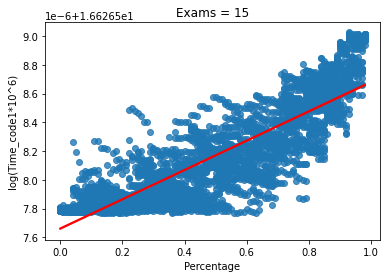

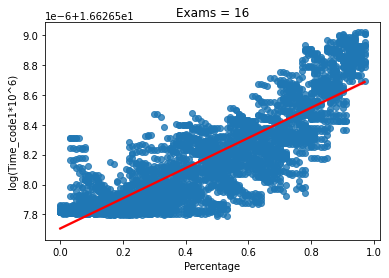

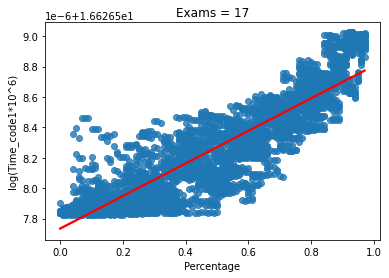

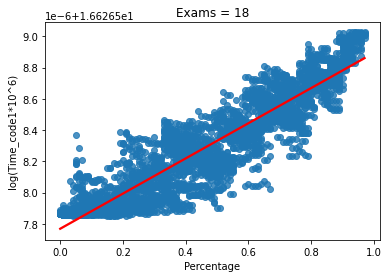

In [ ]:
p_class = df.loc[:, ["Exams"]].applymap(lambda x: str(x))
time_code = "Time_code1"
df[time_code] = df[time_code].apply(lambda y: math.log(y * (10 ** 6)))
df[time_code] = df[time_code].apply(lambda y: math.log(y * (10 ** 6)))
for e in range(6, 19, 1):

    p_index = p_class.applymap(lambda x: x in [str(e)])["Exams"]

    grid = sns.regplot(data=df.loc[p_index], x="Percentage", y=time_code, line_kws={"color": "red"})
    grid.set(ylabel=f"log({time_code}*10^6)", title=f"Exams = {str(e)}")

    plt.show()

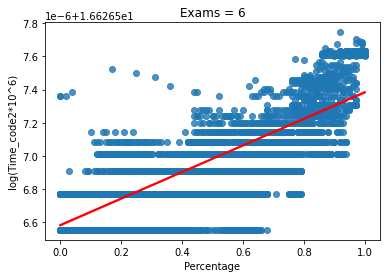

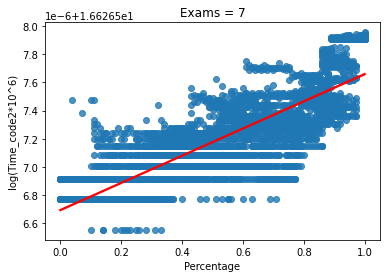

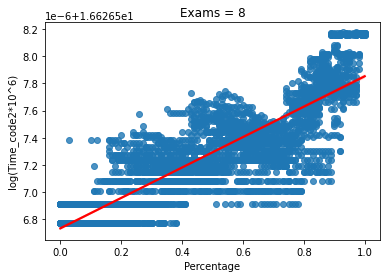

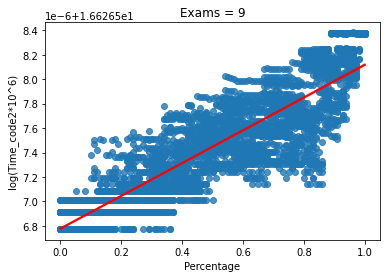

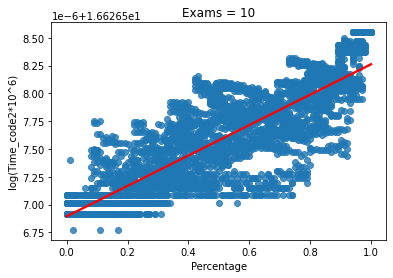

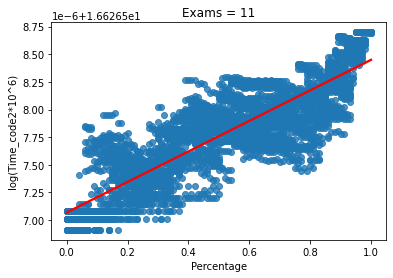

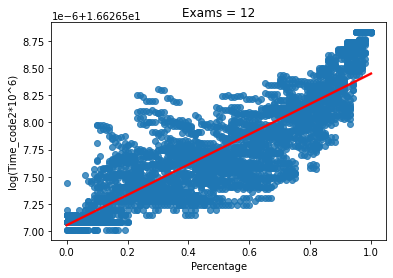

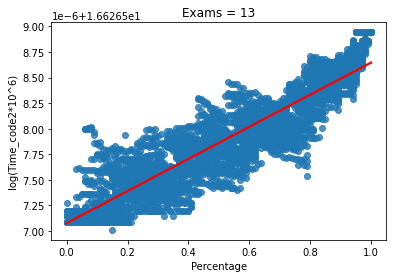

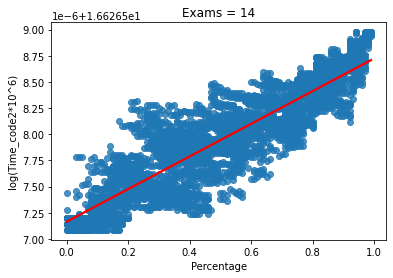

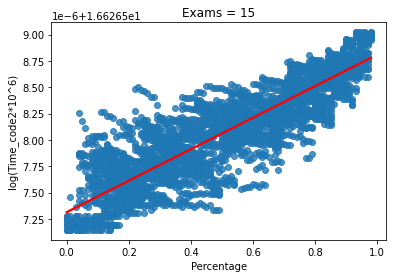

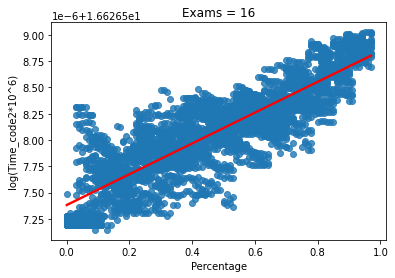

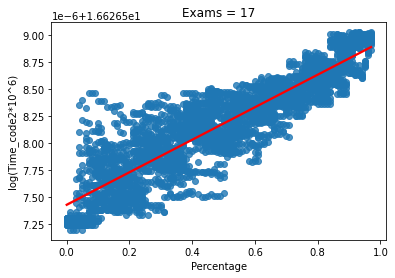

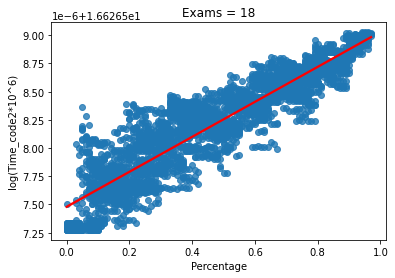

In [ ]:
p_class = df.loc[:, ["Exams"]].applymap(lambda x: str(x))
time_code = "Time_code2"
df[time_code] = df[time_code].apply(lambda y: math.log(y * (10 ** 6)))
df[time_code] = df[time_code].apply(lambda y: math.log(y * (10 ** 6)))
for e in range(6, 19, 1):

    p_index = p_class.applymap(lambda x: x in [str(e)])["Exams"]

    grid = sns.regplot(data=df.loc[p_index], x="Percentage", y=time_code, line_kws={"color": "red"})
    grid.set(ylabel=f"log({time_code}*10^6)", title=f"Exams = {str(e)}")

    plt.show()

## Graph Representation

In [15]:
#Get graphs
!pip -q install --upgrade gdown
!pip -q install parse
!gdown -q --folder https://drive.google.com/drive/folders/1ZETO3mYCEz7MWHcusXVeEJpjW1TyU9r9?usp=sharing

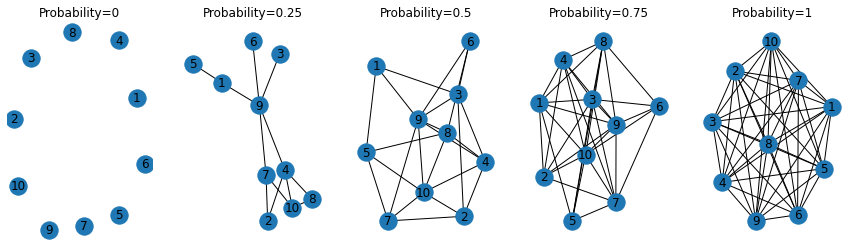

In [18]:
import networkx as nx
from parse import parse

fig, axes = plt.subplots(nrows=1,
                               ncols=5,
                               figsize=(15, 4))

for j,p in enumerate([0, 0.25, 0.5, 0.75, 1]):
  g = nx.Graph()
  with open(f"graphs/data{j+1}.in","r") as f1:
    lines = f1.readlines()
  nodes, edges = parse("{} {}\n", lines[0])

  for i in range(int(nodes)):
    g.add_node(i+1)

  for l in lines[1:]:
    n1, n2 = parse("{} {}\n", l)
    g.add_edge(int(n1), int(n2))

  nx.draw(g, with_labels=True, ax=axes[j])
  axes[j].set_title(f"Probability={p}")